In [21]:
import sys
!{sys.executable} -m pip install pandasql

## Amazon Sales Dataset Description:

- This dataset contains 250 records of Amazon sales transactions, including details about the products sold, customers, payment methods, and order statuses.

## Columns Description:

- Date: Date of the order.
- Product: Name of the product purchased.
- Category: Product category (Electronics, Clothing, Home Appliances, etc.).
- Price: Price of a single unit of the product.
- Quantity: Number of units purchased in the order.
- Total Sales: Total revenue from the order (Price × Quantity).
- Customer Name: Name of the customer.
- Customer Location: City where the customer is based.
- Payment Method: Mode of payment (Credit Card, Debit Card, PayPal, etc.).
- Status: Order status (Completed, Pending, or Cancelled).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as psql

In [2]:
df = pd.read_excel("amazon_sales_data 2025.xlsx")

In [3]:
df

,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,2025-03-10,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...
245,2025-03-17,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,2025-03-30,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,2025-03-05,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,2025-03-08,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               250 non-null    datetime64[ns]
 1   Product            250 non-null    object        
 2   Category           250 non-null    object        
 3   Price              250 non-null    int64         
 4   Quantity           250 non-null    int64         
 5   Total Sales        250 non-null    int64         
 6   Customer Name      250 non-null    object        
 7   Customer Location  250 non-null    object        
 8   Payment Method     250 non-null    object        
 9   Status             250 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 19.7+ KB


## Goals:
- Track Sales Performance Over Time
- Identify top-selling products.
- Compare sales performance by product category (e.g., Electronics vs. Clothing).
- Track repeat purchases by customer names.
- Analyze location-based trends (e.g., what sells best in New York vs. Dallas).
- See which payment methods are most commonly used.
- Compare success/failure rates (Completed vs. Cancelled/Pending) by payment method.
- Calculate the ratio of Completed vs. Pending vs. Cancelled orders.
- Investigate reasons for high cancellation rates (e.g., specific product, location, or payment method).

## Goal 1: Track Sales Performance Over Time.

In [72]:
Sales = """SELECT "Total Sales", Date
FROM df"""

In [74]:
df_Sales = psql.sqldf(Sales, globals())

In [76]:
df_Sales

,Total Sales,Date
0,180,2025-03-14 00:00:00.000000
1,400,2025-03-20 00:00:00.000000
2,120,2025-02-15 00:00:00.000000
3,180,2025-02-19 00:00:00.000000
4,450,2025-03-10 00:00:00.000000
...,...,...
245,40,2025-03-17 00:00:00.000000
246,40,2025-03-30 00:00:00.000000
247,40,2025-03-05 00:00:00.000000
248,450,2025-03-08 00:00:00.000000


In [82]:
df_Sales['Date'] = pd.to_datetime(df_Sales['Date'])

In [97]:
df_Sales["Month"] = df_Sales["Date"].dt.month

In [99]:
df_Sales

,Total Sales,Date,Month
0,180,2025-03-14,3
1,400,2025-03-20,3
2,120,2025-02-15,2
3,180,2025-02-19,2
4,450,2025-03-10,3
...,...,...,...
245,40,2025-03-17,3
246,40,2025-03-30,3
247,40,2025-03-05,3
248,450,2025-03-08,3


In [101]:
Sales_arrange = df_Sales.sort_values(by = "Total Sales", ascending = False)

In [103]:
Sales_arrange

,Total Sales,Date,Month
125,6000,2025-02-04,2
92,6000,2025-03-06,3
63,4800,2025-02-13,2
68,4800,2025-02-25,2
73,4800,2025-03-25,3
...,...,...,...
50,15,2025-02-19,2
32,15,2025-02-04,2
123,15,2025-02-10,2
187,15,2025-02-14,2


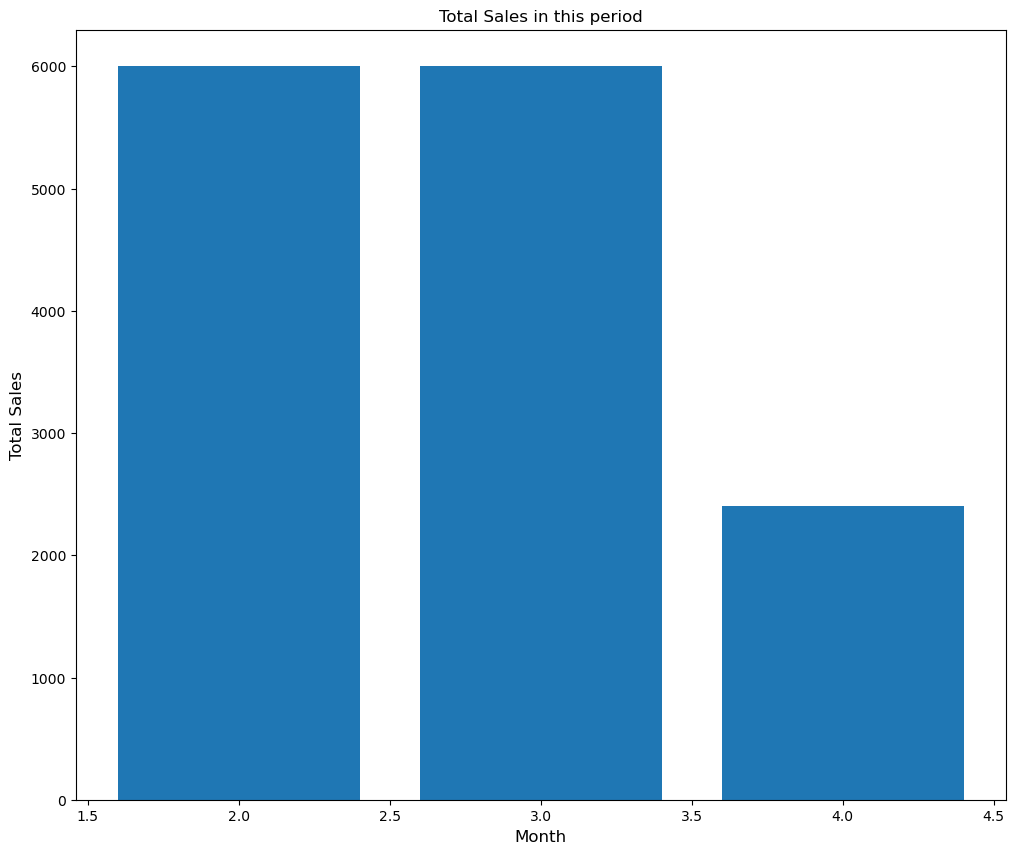

In [109]:
plt.figure(figsize=(12, 10))
plt.bar(Sales_arrange["Month"], Sales_arrange["Total Sales"])
plt.xlabel("Month", size = 12)
plt.xticks()
plt.ylabel("Total Sales", size = 12)
plt.title("Total Sales in this period")
plt.show()